<a href="https://colab.research.google.com/github/vineethkumar1608/datasciene1/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

1) Delivery_time -> Predict delivery time using sorting time

In [6]:
delivery = pd.read_csv("delivery_time.csv")

In [7]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


-No null values

In [34]:
delivery[delivery.duplicated()]

,delivery_time,sorting_time


-No duplicate data

In [8]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


- Strong Positive Correlation

<ipython-input-11-8d324802e8de>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery["Delivery Time"])


<Axes: xlabel='Delivery Time', ylabel='Density'>

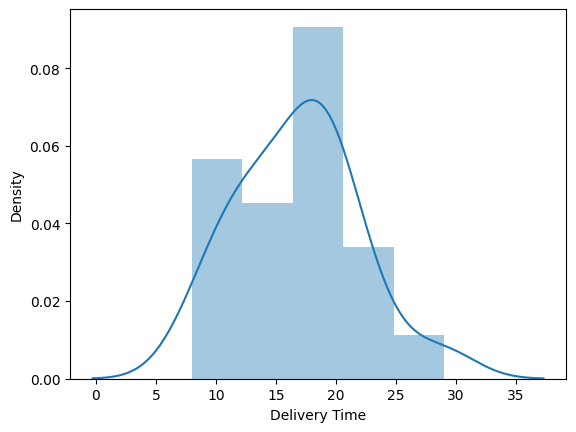

In [11]:
sns.distplot(delivery["Delivery Time"])

<ipython-input-18-abcc776ca273>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery["Sorting Time"])


<Axes: xlabel='Sorting Time', ylabel='Density'>

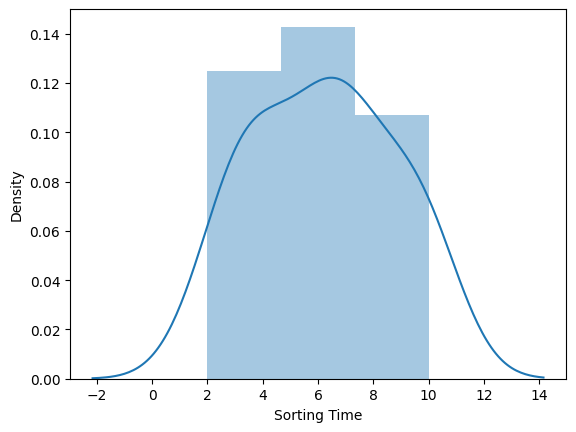

In [18]:
sns.distplot(delivery["Sorting Time"])

In [8]:
 delivery=delivery.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
delivery.head(5)

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


- Performing transformation on each columns


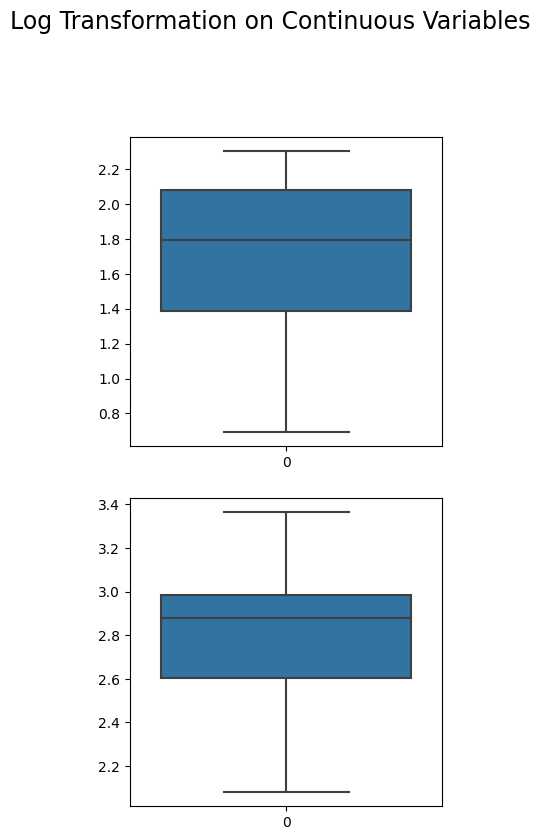

In [18]:
fig, ax=plt.subplots(2, figsize=(4,8), sharex= False, sharey = False)
sns.boxplot(np.log(delivery.sorting_time), ax=ax[0])
sns.boxplot(np.log(delivery.delivery_time), ax=ax[1])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

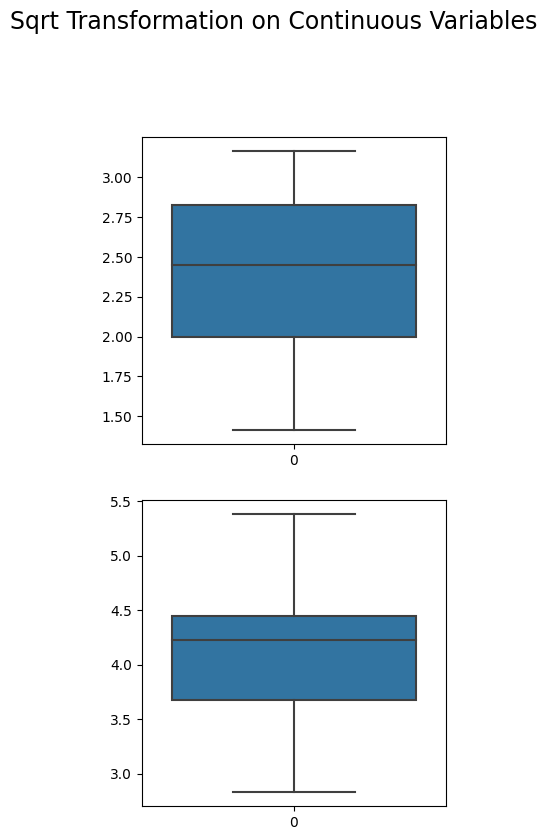

In [21]:
fig, ax=plt.subplots(2, figsize=(4,8), sharex= False, sharey = False)
sns.boxplot(np.sqrt(delivery.sorting_time), ax=ax[0])
sns.boxplot(np.sqrt(delivery.delivery_time), ax=ax[1])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

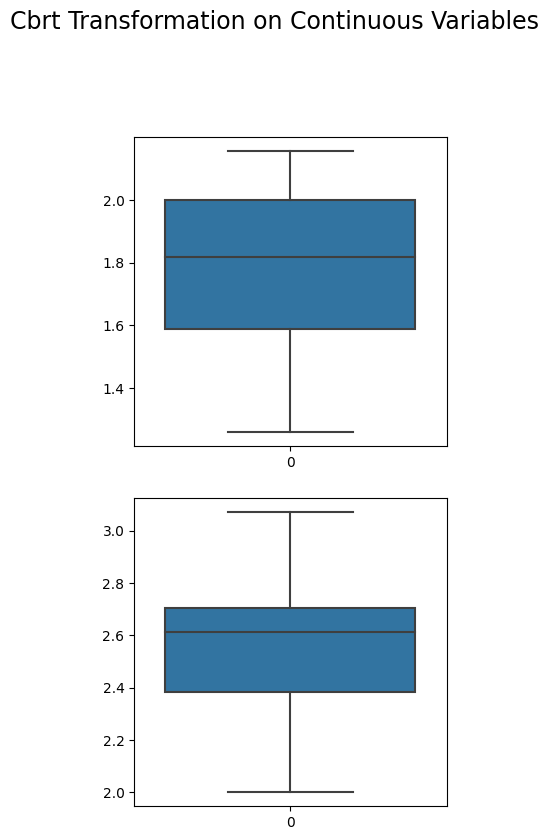

In [22]:
fig, ax=plt.subplots(2, figsize=(4,8), sharex= False, sharey = False)
sns.boxplot(np.cbrt(delivery.sorting_time), ax=ax[0])
sns.boxplot(np.cbrt(delivery.delivery_time), ax=ax[1])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

<Axes: xlabel='delivery_time', ylabel='sorting_time'>

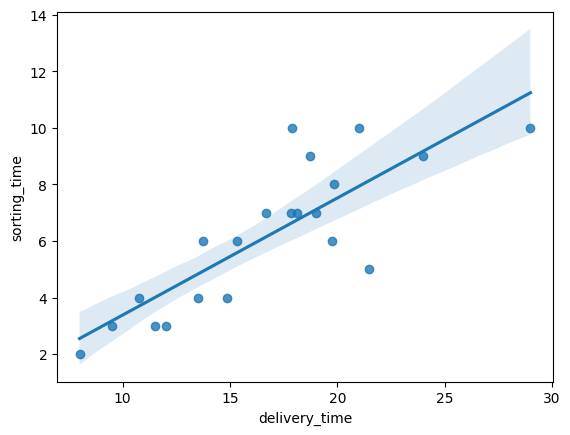

In [26]:
 import statsmodels.formula.api as snf
model = snf.ols("delivery_time~sorting_time",data=delivery).fit()
sns.regplot(x="delivery_time",y="sorting_time",data= delivery)

In [27]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [28]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

- P < alpha

In [29]:
model.rsquared

0.6822714748417231

- The model is OK to go.

In [32]:
new=pd.Series([5,8,10])
n1=pd.DataFrame(new,columns=["sorting_time"])
model.predict(n1)

0    14.827833
1    19.774893
2    23.072933
dtype: float64

2) Salary_hike -> Build a prediction model for Salary_hike

In [23]:
salary=pd.read_csv('/content/Salary_Data.csv')
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
salary[salary.duplicated()]

,YearsExperience,Salary


- No duplicate values

In [5]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


- Strong co-relation

In [7]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<ipython-input-8-ab2eeefaaf36>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

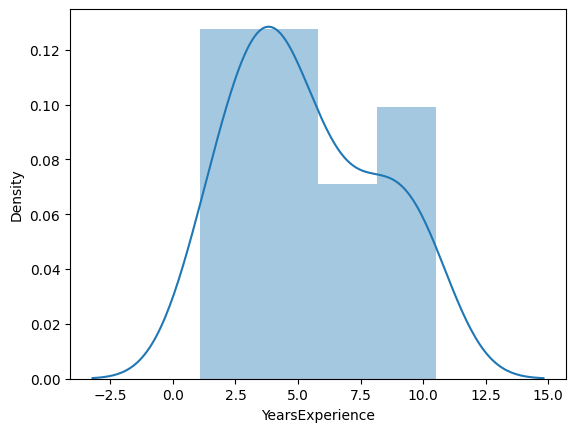

In [8]:
sns.distplot(salary['YearsExperience'])

<ipython-input-9-36cdd9539e89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

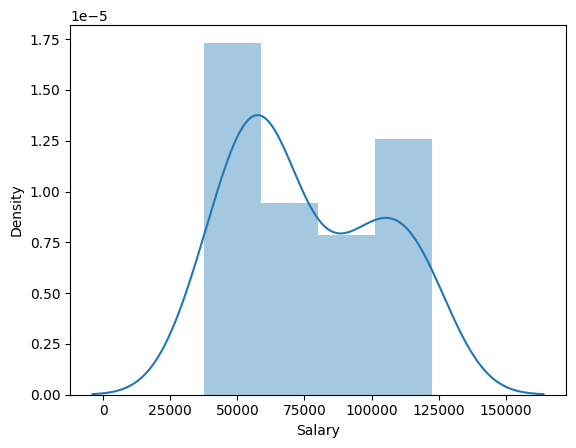

In [9]:
sns.distplot(salary['Salary'])

-Applying transformation on each column

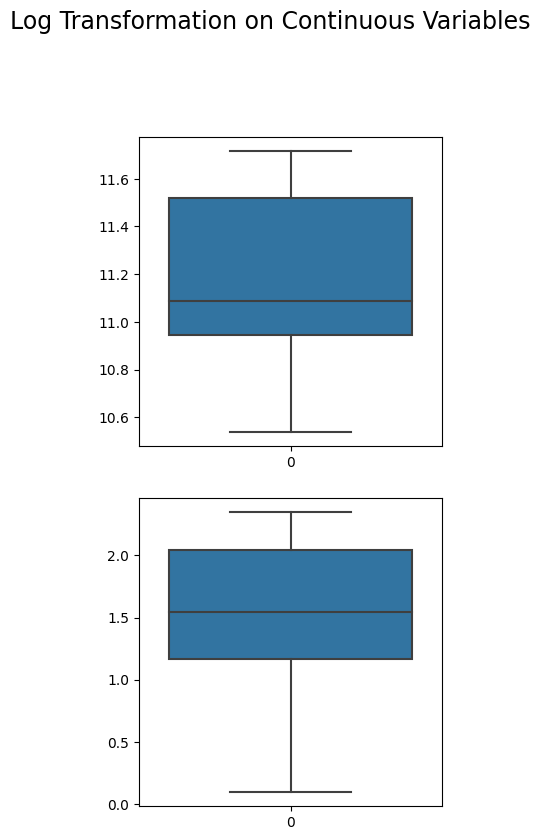

In [24]:
fig, ax=plt.subplots(2, figsize=(4,8), sharex= False, sharey = False)
sns.boxplot(np.log(salary.Salary), ax=ax[0])
sns.boxplot(np.log(salary.YearsExperience), ax=ax[1])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

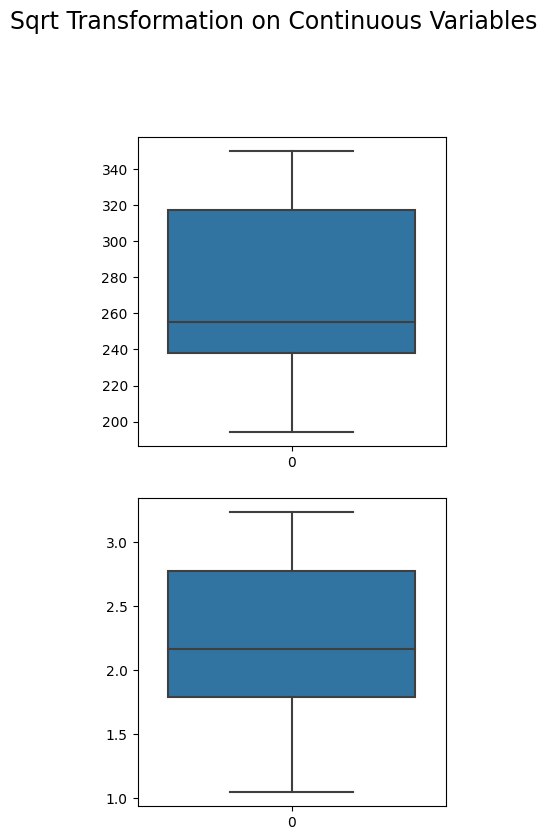

In [25]:
fig, ax=plt.subplots(2, figsize=(4,8), sharex= False, sharey = False)
sns.boxplot(np.sqrt(salary.Salary), ax=ax[0])
sns.boxplot(np.sqrt(salary.YearsExperience), ax=ax[1])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

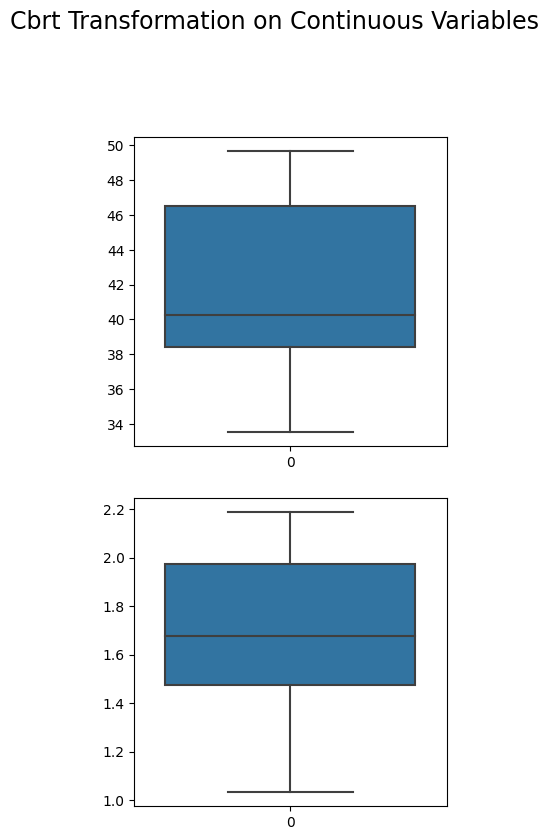

In [26]:
fig, ax=plt.subplots(2, figsize=(4,8), sharex= False, sharey = False)
sns.boxplot(np.cbrt(salary.Salary), ax=ax[0])
sns.boxplot(np.cbrt(salary.YearsExperience), ax=ax[1])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

<Axes: xlabel='Salary', ylabel='YearsExperience'>

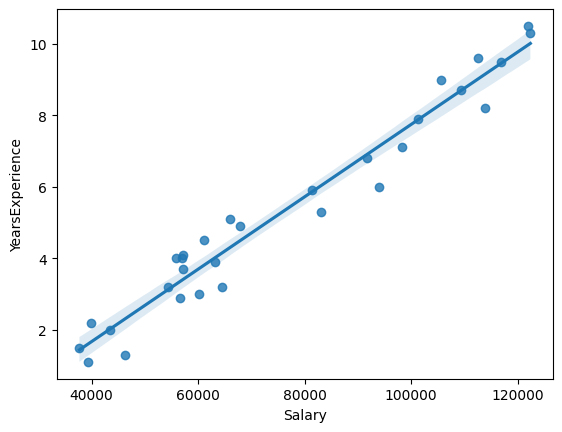

In [21]:
 import statsmodels.formula.api as snf
model = snf.ols("Salary~YearsExperience",data=salary).fit()
sns.regplot(x="Salary",y="YearsExperience",data= salary)

In [22]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [23]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

 - Salary variable is significant

In [24]:
model.rsquared

0.9569566641435086

Model is good to go.

In [27]:
new2=pd.Series([3,5,10,20])
n2=pd.DataFrame(new2,columns=['YearsExperience'])
model.predict(n2)

0     54142.087163
1     73042.011806
2    120291.823413
3    214791.446628
dtype: float64